# Daily COVID-19 new cases Forecasting Using RNN, ML and ARIMA


Data reporting daily COVID-19 new cases is available at https://github.com/CSSEGISandData/COVID-19.

This data is provided by the Joun Hopkins University based on the data about new cases provided by the countries all around the world.


In [197]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import keras
from sklearn import linear_model
import torch 
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\bidar20m\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


# Get the Time Series Data

In [199]:
df=pd.read_csv("C://Users//COVID-19-master//csse_covid_19_data//csse_covid_19_time_series//time_series_covid19_confirmed_global.csv")

# Exploring the data
data in this sheet is presented in form of the cumulative and to find out the new cases for every day we need to subtract the values

In [200]:
df.iloc[:,45:55]

,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
0,1,1,1,1,1,4,4,5,7,7
1,0,0,0,0,0,0,2,10,12,23
2,5,12,12,17,17,19,20,20,20,24
3,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0


In [201]:
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,31577,32785,34159,35552,37510,39570,41204,42785,44931,47203
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,16667,17064,17489,18033,18698,19157,19708,20268,20588,21006
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159


 This data in reporting new cases based on the countries and in some cases their different regions, but we want just forecast the new cases for countries, therefor we use groupby to group them based on the countries

In [202]:
df[df['Country/Region']=='Australia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3131,3134,3135,3137,3143,3144,3149,3151,3150,3159
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1065,1065,1066,1066,1066,1066,1066,1066,1066,1066
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1732,1741,1762,1780,1792,1792,1836,1847,1864,1884
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,602,602,602,603,603,604,605,605,607,607


# Summarize the data
Perform groupby to sumarize the data based on the new cases of a country, not based on the regions

In [203]:
df1=df.groupby(['Country/Region']).sum()

In [204]:
df1.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [205]:
index=df1.index
print("The shape of the df is", df.shape)
print("the shape of the df1",df1.shape)

The shape of the df is (266, 158)
the shape of the df1 (188, 156)


# Depicting the accumulative new cases growth in randomly chosen countries

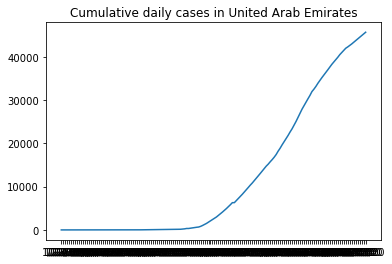

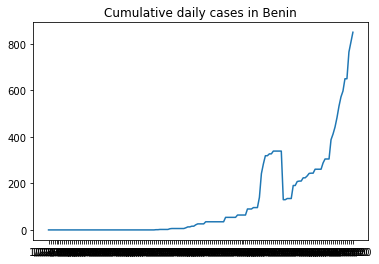

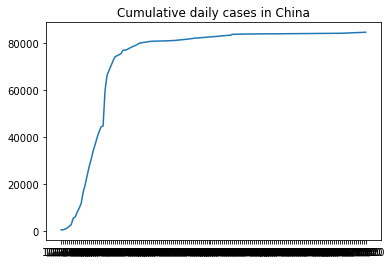

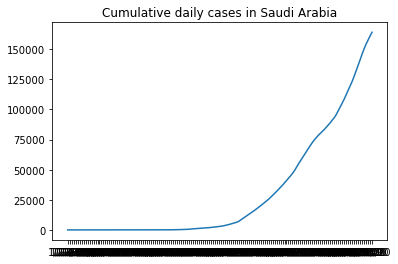

In [206]:

from numpy.random import seed
from numpy.random import randint
DF={}
RND={}
values = randint(4, 188, 4)
for i, rnd in enumerate(values):
    DF[i]= df1.iloc[rnd, 2:]
    RND[i]=index[rnd]

for i in range(len(DF)):
    plt.plot(DF[i], label = RND[i])
    plt.title("Cumulative daily cases in "+ RND[i]); 
    plt.show()
 

In [207]:
# we Dont need first two columns
df1=df1.iloc[:,2:]
df1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481
Albania,0,0,0,0,0,0,0,0,0,0,...,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047
Algeria,0,0,0,0,0,0,0,0,0,0,...,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,854,854,855,855,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,140,142,148,155,166,172,176,183,186,189


In [208]:
# checking to see if there are null values
df1.isnull().sum().any()

False

 We can do forecasting for each country or do forecasting for all countries, lets do forecasting for all countries this time

In [209]:
daily_confirmed_cases = df1.sum(axis=0)

In [210]:
daily_confirmed_cases.head()

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
dtype: int64

In [211]:
daily_confirmed_cases.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/14/20', '6/15/20', '6/16/20', '6/17/20', '6/18/20', '6/19/20',
       '6/20/20', '6/21/20', '6/22/20', '6/23/20'],
      dtype='object', length=154)

In [212]:
daily_confirmed_cases.index = pd.to_datetime(daily_confirmed_cases.index)

In [213]:
daily_confirmed_cases.head()

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

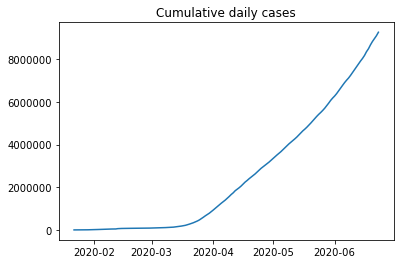

In [214]:
plt.plot(daily_confirmed_cases)
plt.title("Cumulative daily cases");

In [215]:
new_cases = daily_confirmed_cases.diff().dropna().astype(np.int64)
new_cases

2020-01-23        99
2020-01-24       287
2020-01-25       493
2020-01-26       684
2020-01-27       809
               ...  
2020-06-19    181347
2020-06-20    158863
2020-06-21    131421
2020-06-22    138036
2020-06-23    164823
Length: 153, dtype: int64

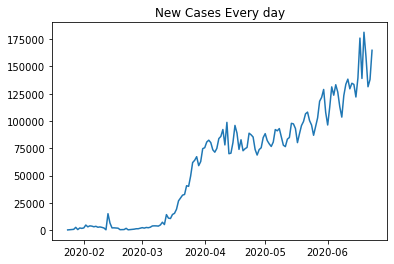

In [216]:
plt.plot(new_cases[1:])
plt.title("New Cases Every day");

In [217]:
new_cases.shape

(153,)

# Splitting data to training and testing data

In [218]:

def train_test_split(new_cases, pct):
    In_n=int(np.ceil(pct*len(new_cases)))
    X_train=new_cases[:In_n+1]
    X_test=new_cases[In_n:]
    return X_train, X_test
 
pct=0.75
train_data,test_data = train_test_split(new_cases, pct)

In [219]:
train_data.shape

(116,)

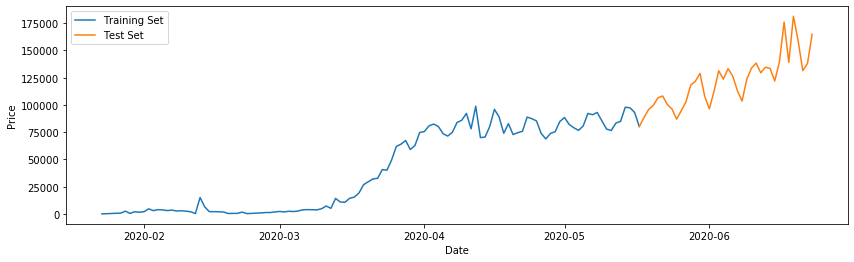

In [220]:
plt.figure(figsize=(14,4))
plt.plot(train_data)
plt.plot(test_data)
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["Training Set", "Test Set"])

# Data Normalization

In [221]:
scaler = MinMaxScaler()
scaler = scaler.fit((np.array(train_data)).reshape(-1,1))
train_data = scaler.transform((np.array(train_data)).reshape(-1,1))
test_data = scaler.transform((np.array(test_data)).reshape(-1,1))

In [222]:
test_data.shape 

(38, 1)

# Creating Sequences

In [223]:
X_train = []
y_train = []

lengthTr = len(train_data)
timeStamp=10
for i in range(timeStamp,lengthTr):
    X_train.append(train_data[i-timeStamp:i])
    y_train.append(train_data[i])

X_train=np.array(X_train)
y_train=np.array(y_train)


X_test = []
y_test = [] 

lengthTe = len(test_data)
for i in range(timeStamp, lengthTe):
    X_test.append(test_data[i-timeStamp:i])
    y_test.append(test_data[i])

X_test=np.array(X_test)
y_test=np.array(y_test)

In [224]:
X_test.shape

(28, 10, 1)

Figure below depict how we generate X_train and y_train
timeStamp=5


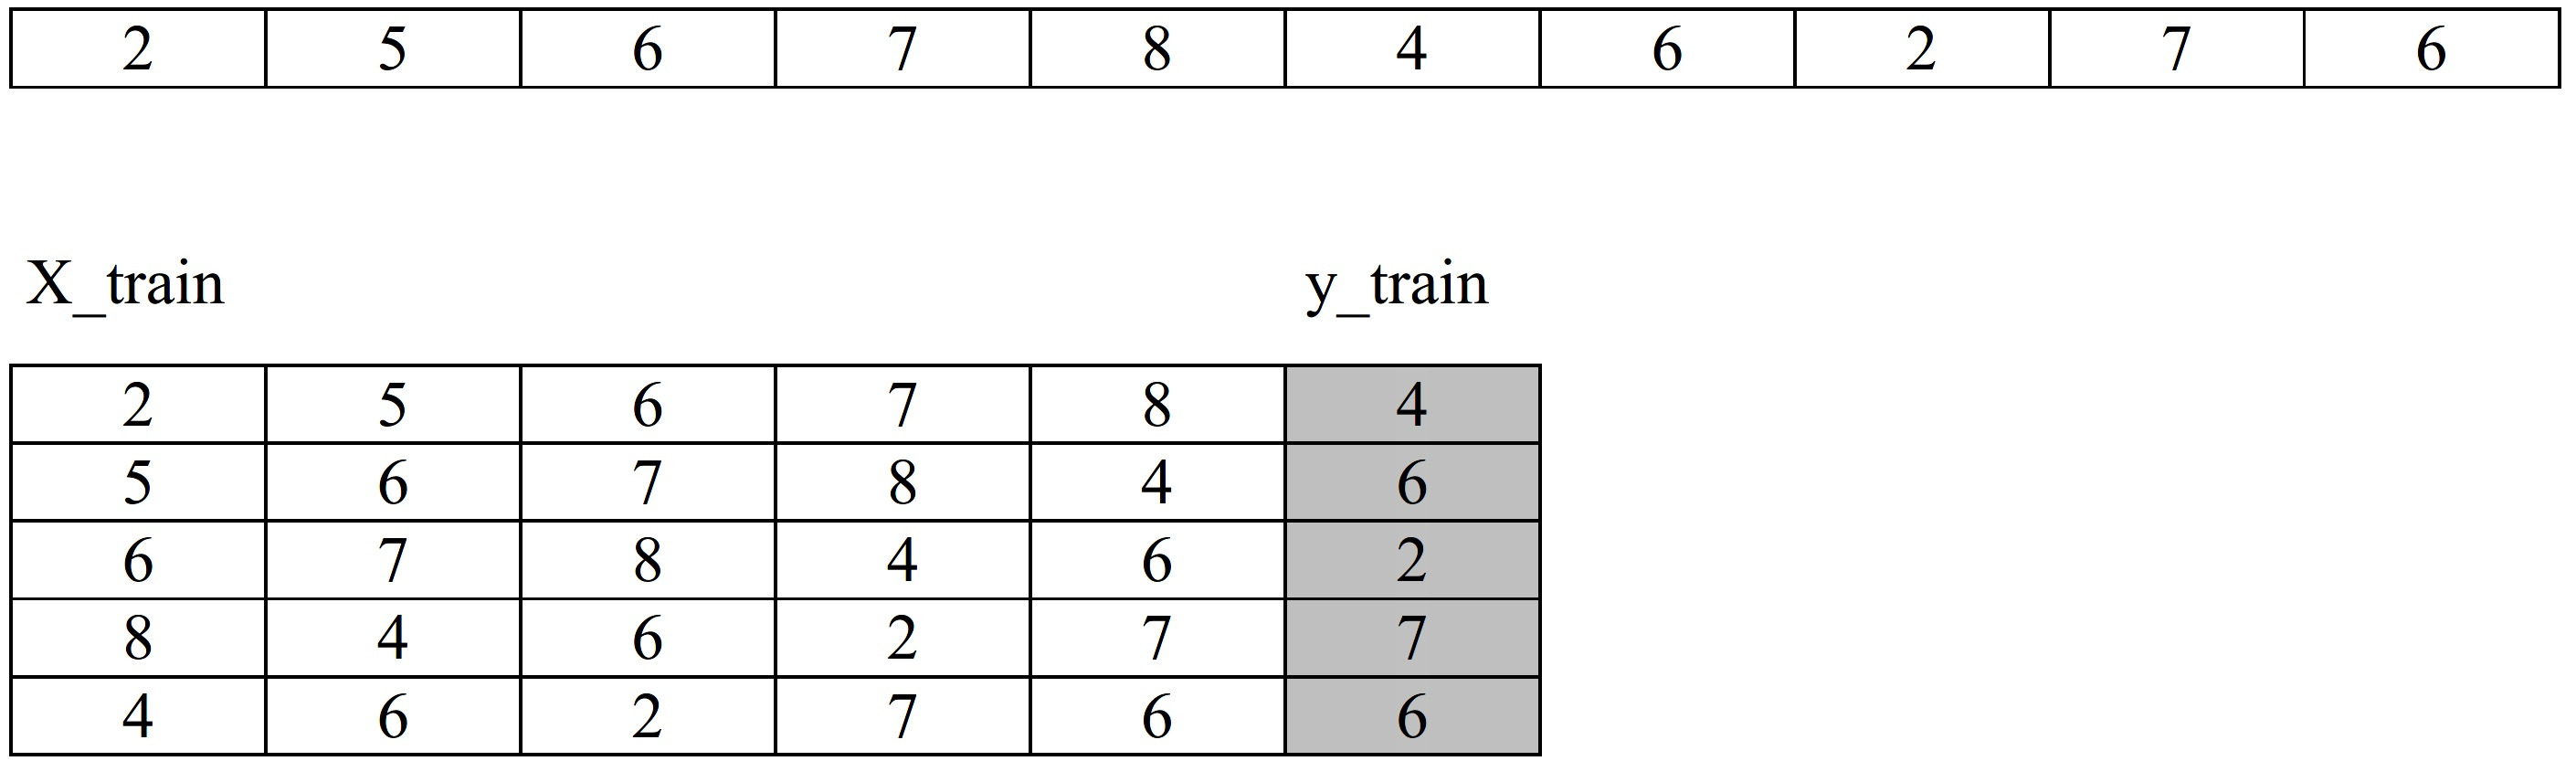

In [225]:
print("Figure below depict how we generate X_train and y_train")
print("timeStamp=5")
from IPython.display import Image
Image("C://Users//bidar20m//Desktop//ax.jpg")

In [226]:
X_train.shape

(106, 10, 1)

In [227]:
# Sample of Sequence 
X_train[0], y_train[0]

(array([[0.        ],
        [0.0019047 ],
        [0.00399177],
        [0.00592687],
        [0.0071933 ],
        [0.02585534],
        [0.00495426],
        [0.01994874],
        [0.01614946],
        [0.02038439]]),
 array([0.04711103]))

# Designing NN Models for Stock Price Prediction
Models:
1. LSTM
2. GRU


In [232]:
model = Sequential([
                    keras.layers.LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1],1)),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20, return_sequences=True),
                    Dropout(0.4),

                    keras.layers.LSTM(units=20),
                    Dropout(0.4),

                    keras.layers.Dense(units=1),
                   ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 10, 30)            3840      
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 20)            4080      
_________________________________________________________________
dropout_21 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 10, 20)            3280      
_________________________________________________________________
dropout_22 (Dropout)         (None, 10, 20)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 20)               

In [233]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_squared_error'])

In [234]:
model.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
106/106 [==============================] - 1s 12ms/step - loss: 0.3728 - mean_squared_error: 0.3728
Epoch 2/50
106/106 [==============================] - 0s 151us/step - loss: 0.3225 - mean_squared_error: 0.3225
Epoch 3/50
106/106 [==============================] - 0s 151us/step - loss: 0.2857 - mean_squared_error: 0.2857
Epoch 4/50
106/106 [==============================] - 0s 189us/step - loss: 0.2546 - mean_squared_error: 0.2546
Epoch 5/50
106/106 [==============================] - 0s 217us/step - loss: 0.2178 - mean_squared_error: 0.2178
Epoch 6/50
106/106 [==============================] - 0s 189us/step - loss: 0.1729 - mean_squared_error: 0.1729
Epoch 7/50
106/106 [==============================] - 0s 189us/step - loss: 0.1356 - mean_squared_error: 0.1356
Epoch 8/50
106/106 [==============================] - 0s 236us/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 9/50
106/106 [==============================] - 0s 236us/step - loss: 0.0847 - mean_squared_error: 

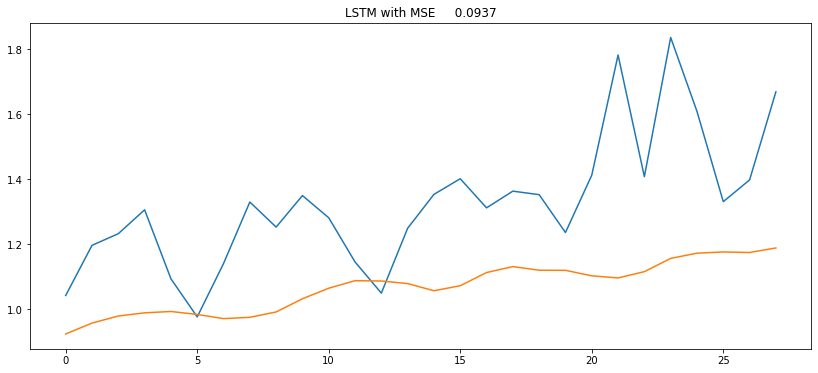

In [187]:
pred_result = {}

y_true = (y_test)
y_pred = (model.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

In [188]:
model_GRU= Sequential([
                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
                Dropout(0.2),

                keras.layers.GRU(units=50, activation='tanh'),
                Dropout(0.2),

                keras.layers.Dense(units=1)])



model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

model_GRU.fit(X_train, y_train,epochs=50,batch_size=150)

Epoch 1/50
106/106 [==============================] - 1s 13ms/step - loss: 0.3454
Epoch 2/50
106/106 [==============================] - 0s 217us/step - loss: 0.2956
Epoch 3/50
106/106 [==============================] - 0s 255us/step - loss: 0.2288
Epoch 4/50
106/106 [==============================] - 0s 255us/step - loss: 0.1628
Epoch 5/50
106/106 [==============================] - 0s 302us/step - loss: 0.1214
Epoch 6/50
106/106 [==============================] - 0s 255us/step - loss: 0.1153
Epoch 7/50
106/106 [==============================] - 0s 321us/step - loss: 0.1297
Epoch 8/50
106/106 [==============================] - 0s 255us/step - loss: 0.1498
Epoch 9/50
106/106 [==============================] - 0s 292us/step - loss: 0.1662
Epoch 10/50
106/106 [==============================] - 0s 302us/step - loss: 0.1780
Epoch 11/50
106/106 [==============================] - 0s 255us/step - loss: 0.1463
Epoch 12/50
106/106 [==============================] - 0s 330us/step - loss: 0.1251
Ep

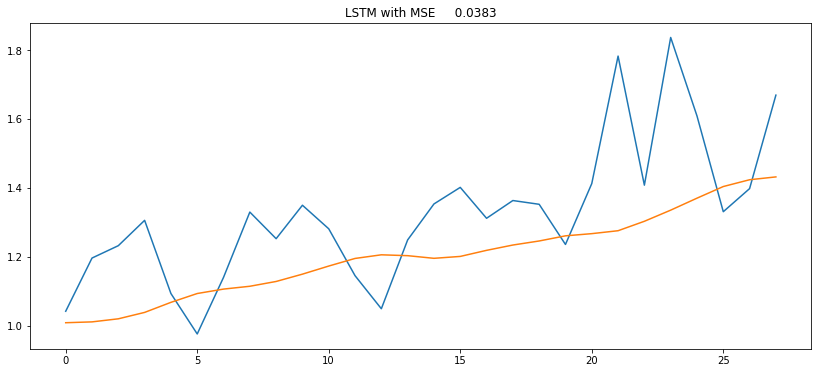

In [189]:
pred_result = {}

y_true = (y_test.reshape(-1,1))
y_pred = (model_GRU.predict(X_test))
MSE = mean_squared_error(y_true, y_pred)
pred_result= {}
pred_result["True"] = y_true
pred_result["Pred"] = y_pred

plt.figure(figsize=(14,6))
plt.title("LSTM with MSE {:10.4f}".format(MSE))
plt.plot(y_true)
plt.plot(y_pred)

# Machine learning algorithms for forecasting new cases

Preparing Data

In [190]:
nsamples, nx, ny = X_train.shape
d2_X_train= X_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = X_test.shape
d2_X_test= X_test.reshape((nsamples,nx*ny))

In [191]:
d2_X_train.shape

(106, 10)

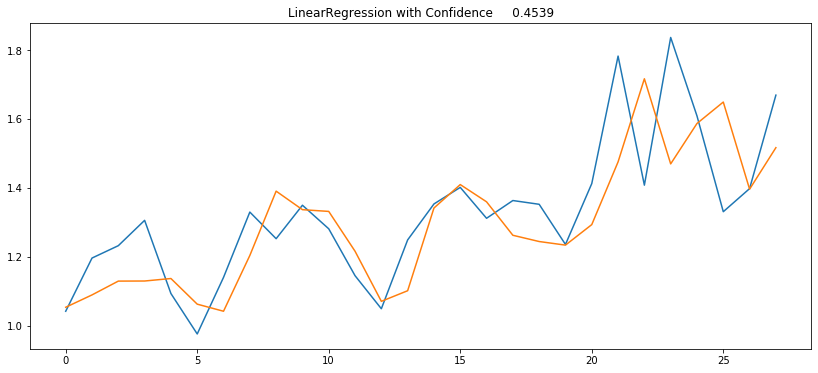

In [193]:
model=LinearRegression(n_jobs=-2)
name="LinearRegression"
model.fit(d2_X_train, y_train)
confidence = model.score(d2_X_test, y_test)
Close= (y_test.reshape(-1,1))
pred_close = (model.predict(d2_X_test))
plt.figure(figsize=(14,6))
plt.title("{} with Confidence {:10.4f}".format(name, confidence))

plt.plot(Close)
plt.plot(pred_close)

# ARIMA
AutoRegressive Integrated Moving Average for COVID-19 NEW cases Forecasting

In [235]:
df1=df.groupby(['Country/Region']).sum()

In [236]:
# we Dont need first two columns
df1=df1.iloc[:,2:]
df1.head()
daily_confirmed_cases = df1.sum(axis=0)
daily_confirmed_cases.index = pd.to_datetime(daily_confirmed_cases.index)

In [237]:
new_cases = daily_confirmed_cases.diff().dropna().astype(np.int64)

def train_test_split(new_cases, pct):
    In_n=int(np.ceil(pct*len(new_cases)))
    X_train=new_cases[:In_n+1]
    X_test=new_cases[In_n:]
    return X_train, X_test
 
pct=0.75
train_data,test_data = train_test_split(new_cases, pct)

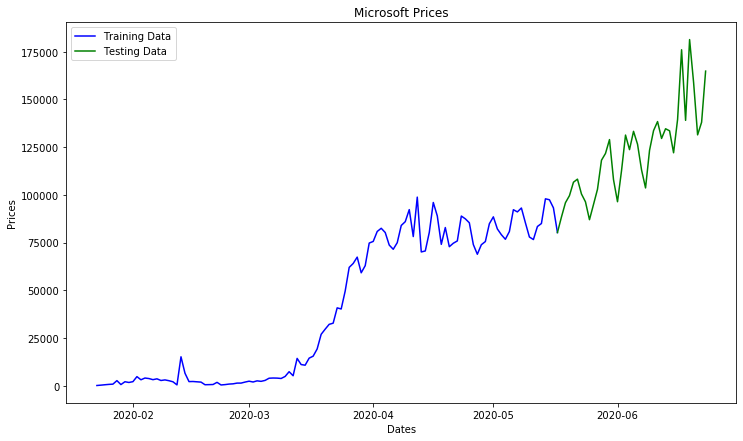

In [238]:
#train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')

plt.legend()

In [239]:
train_ar = train_data
test_ar = test_data
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)


<class 'list'>


Text(0, 0.5, 'New cases')

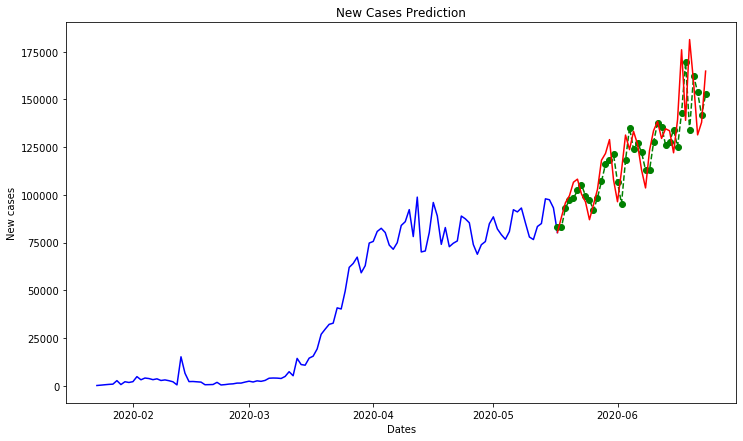

In [240]:
plt.figure(figsize=(12,7))
plt.plot(train_data, 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Values')
plt.plot(test_data.index, test_data, color='red', label='Actual Values')
plt.title('New Cases Prediction')
plt.xlabel('Dates')
plt.ylabel('New cases')
